# Assignment 2 - Boston Housing Case

In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
plt.style.use('seaborn')

### Load Data

In [2]:
df = pd.read_csv('boston_housing.csv')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

Target Feature = medv

C:\Users\Awan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


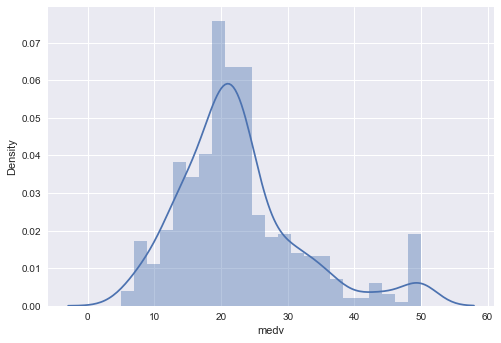

In [19]:
sns.distplot(df['medv'])
plt.show()

In [15]:
df_corr = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

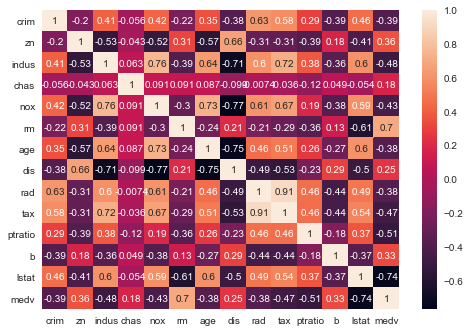

In [16]:
sns.heatmap(data = df_corr, annot = True)
plt.show

Independent Feature = rm & lstat

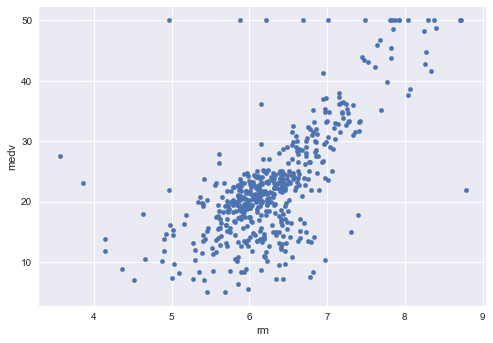

In [28]:
df.plot.scatter(x = 'rm', y = 'medv')
plt.show()

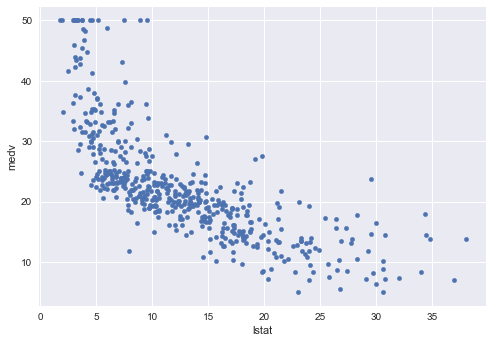

In [29]:
df.plot.scatter(x = 'lstat', y = 'medv')
plt.show()

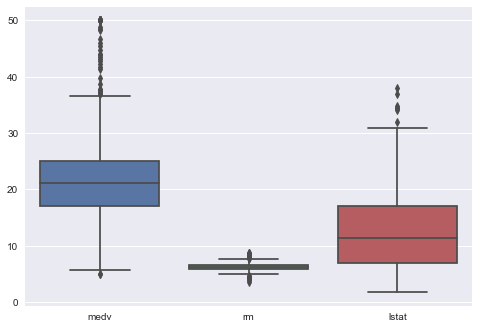

In [208]:
sns.boxplot(data = df[['medv', 'rm', 'lstat']])
plt.show()

### Splitting Data

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [171]:
train_df, test_df = train_test_split(df, train_size = 0.8, random_state = 2)

In [172]:
train_df.shape

(404, 14)

In [173]:
test_df.shape

(102, 14)

### Prepare Data

In [174]:
train_target = train_df[['medv']]
train_target.head()

,medv
321,23.1
37,21.0
286,20.1
2,34.7
25,13.9


In [175]:
train_feature = train_df[['rm', 'lstat']]
train_feature.head()

,rm,lstat
321,6.376,6.87
37,5.850,8.77
286,6.230,12.93
2,7.185,4.03
25,5.599,16.51


In [176]:
test_target = test_df[['medv']]
test_target.head()

,medv
463,20.2
152,15.3
291,37.3
183,32.5
384,8.8


In [177]:
test_feature = test_df[['rm', 'lstat']]
test_feature.head()

,rm,lstat
463,6.513,10.29
152,5.012,12.12
291,7.148,3.56
183,6.563,5.68
384,4.368,30.63


### Training Model

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lr = LinearRegression()

In [180]:
lr.fit(X = train_feature, y = train_target)

LinearRegression()

### Test Model

In [181]:
from sklearn.metrics import r2_score

In [182]:
lr_acc = lr.score(test_feature, test_target)

In [190]:
print('Accuration :',lr_acc*100,'%')

Accuration : 71.75039832076541 %


In [191]:
predict = lr.predict(test_feature)

In [197]:
lr.coef_

array([[ 4.81984148, -0.67207037]])

In [198]:
lr.intercept_

array([0.69858227])

In [199]:
print('Linear Eq : Y = 4.81984148*rm - 0.67207037*lstst + 0.69858227')

Linear Eq : Y = 4.81984148*rm - 0.67207037*lstst + 0.69858227
